Пример H2O AutoML: Анализ цены акций Tesla
Tesla, Inc. является одной из ведущих компаний в индустрии электромобилей и чистой энергии. Акции Tesla привлекли внимание инвесторов по всему миру благодаря их значительному росту и волатильности. В этом разделе мы проведем анализ цены акций Tesla, чтобы понять как временные ряды могут быть использованы для прогнозирования финансовых рынков. Для построения прогностической модели мы будем использовать инструмент H2O AutoML.

Цели анализа:

Применить методы машинного обучения для предсказания цены акций Tesla.
Используемые данные: Для анализа будем использовать исторические данные о ценах акций Tesla с Yahoo Finance, охватывающие период с 2010 по 2024 годы. Данные включают в себя дневные цены закрытия (close), корректированные цены закрытия (adj close), максимальные (high) и минимальные (low) цены за день, а также объемы торгов (volume).

In [3]:
#@title Загрузка необходимых библиотек (ЗАПУСТИТЕ ЭТОТ КОД)
!pip install h2o pandas yfinance matplotlib
!pip install sklearn
from IPython.display import clear_output
clear_output()

# Импорт необходимых библиотек
import h2o  # библиотека H2O для машинного обучения
import pandas as pd  # работа с данными
import yfinance as yf  # загрузка финансовых данных
import matplotlib.pyplot as plt  # построение графиков
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from h2o.automl import H2OAutoML

In [10]:
#@title Функции для загрузки, предобработки и визуализации данных (ЗАПУСТИТЕ ЭТОТ КОД)
def load_data():
    """
    Загрузка данных о цене акций Tesla.
    Возвращает:
    DataFrame с историческими данными
    """
    ticker = 'TSLA'
    start_date = '2010-01-01'
    end_date = '2025-01-01'
    data = yf.download(ticker, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    return data

def visualize_data(data):
    """
    Визуализация исходных данных цен на акции.
    Аргументы:
    data -- DataFrame с данными для визуализации
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Цена закрытия')
    plt.title('Исторические цены акций Tesla')
    plt.xlabel('Дата')
    plt.ylabel('Цена в USD')
    plt.legend()
    plt.grid(True)
    plt.show()

def prepare_data(data):
    """
    Подготовка и масштабирование данных.
    Возвращает масштабированные данные и объект scaler.
    """
    data['Date'] = pd.to_datetime(data['Date'])
    data.sort_values('Date', inplace=True)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data[['Close']])
    return data_scaled, scaler

def create_dataset(dataset, look_back=10):
    """
    Создание набора данных для обучения.
    Возвращает массивы X и Y.
    """
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [9]:
# Загрузка данных
data = load_data()
data

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...,...
3605,2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
3606,2024-10-25 00:00:00+00:00,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
3607,2024-10-28 00:00:00+00:00,262.510010,262.510010,273.540009,262.239990,270.000000,107653600


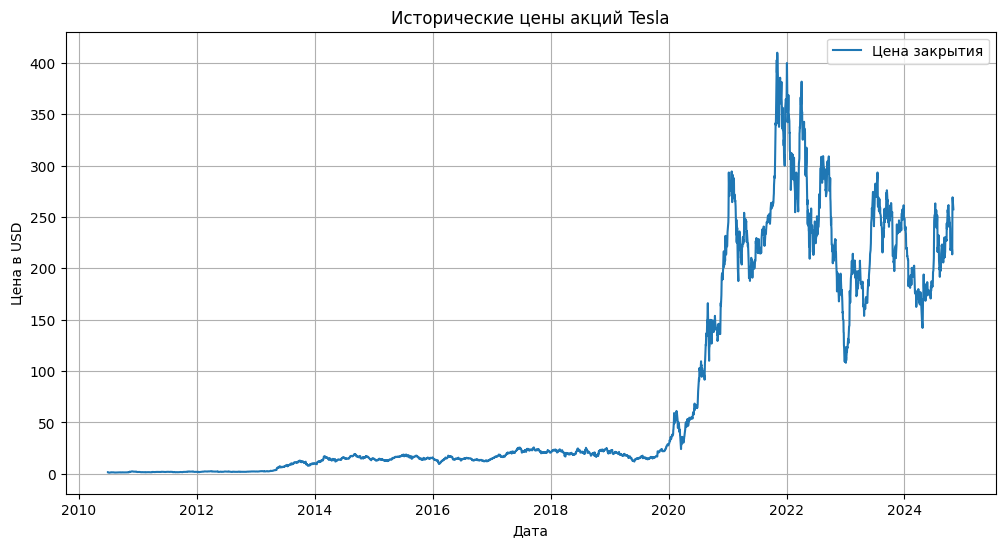

In [13]:
# Визуализация исходных данных
visualize_data(data)

In [15]:
# Нормализация данных
data_scaled, scaler = prepare_data(data)

# Создание наборов данных для обучения с предсказанием 10 шаг
X, y = create_dataset(data_scaled, look_back=10)

In [17]:
print("Форма массива X:", X.shape)
print("Форма массива y:", y.shape)

Форма массива X: (3600, 10)
Форма массива y: (3600,)


Пример формирования выборок для предсказания:

Один шаг (1 день):

dataset = [10, 20, 30, 40, 50]

X = [[10], [20], [30], [40]]

Y = [20, 30, 40, 50]

Три шага:

dataset = [10, 20, 30, 40, 50, 60, 70]

X = [[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]]

Y = [40, 50, 60, 70]

In [20]:
# Определение размера обучающей выборки как 80% от общего количества данных
train_size = int(len(X) * 0.80)

# Создание обучающей выборки: извлекаем первые 80% данных из X и y для обучения
trainX, trainY = X[:train_size], y[:train_size]

# Создание тестовой выборки: извлекаем оставшиеся 20% данных из X и y для тестирования
testX, testY = X[train_size:], y[train_size:]

In [22]:
print("Форма обучающего массива X:", trainX.shape)
print("Форма обучающего массива Y:", trainY.shape)
print("Форма тестового массива X:", testX.shape)
print("Форма тестового массива Y:", testY.shape)

Форма обучающего массива X: (2880, 10)
Форма обучающего массива Y: (2880,)
Форма тестового массива X: (720, 10)
Форма тестового массива Y: (720,)


In [24]:
#@title Функции обучения модели (ЗАПУСТИТЕ ЭТОТ КОД)
def initialize_and_train_h2o(trainX, trainY, testX, testY, max_runtime_secs=1000, max_mem_size="12G"):
    """
    Инициализация H2O и обучение модели H2O AutoML.

    Аргументы:
    trainX, trainY -- обучающие данные X и Y
    testX, testY -- тестовые данные X и Y
    max_runtime_secs -- максимальное время выполнения для AutoML
    max_mem_size -- максимальный размер памяти для H2O

    Возвращает:
    aml -- обученная модель AutoML
    test -- тестовый набор данных в формате H2O Frame
    """
    import h2o
    from h2o.automl import H2OAutoML
    import numpy as np

    # Инициализация H2O
    h2o.init(max_mem_size=max_mem_size)

    # Преобразование данных в формат H2O
    train = h2o.H2OFrame(np.hstack((trainX, trainY.reshape(-1,1))))
    test = h2o.H2OFrame(np.hstack((testX, testY.reshape(-1,1))))
    train.set_names(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'Y'])
    test.set_names(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'Y'])

    # Запуск H2O AutoML
    aml = H2OAutoML(max_models=10, seed=1, max_runtime_secs=max_runtime_secs)
    aml.train(x=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'], y='Y', training_frame=train)

    return aml, test

In [28]:
# Инициализация и запуск обучения модели H2O AutoML
automl_model, test_data = initialize_and_train_h2o(
    trainX=trainX,
    trainY=trainY,
    testX=testX,
    testY=testY,
    max_runtime_secs=1000,
    max_mem_size="12G"
)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...


H2OStartupError: Cannot find Java. Please install the latest JRE from
http://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html#java-requirements

In [ ]:
#pip install h2o